**Objective**:

The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

Dataset:

1. **LB** - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
2. **AC** - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
3. **FM** - May indicate "Fetal Movements" detected by the monitor.
4. **UC** - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
5. **DL** - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
6. **DS** - May represent "Decelerations Short" or decelerations of brief duration.
7. **DP** - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
8. **ASTV** - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
9. **MSTV** - Likely stands for "Mean Value of Short Term Variability" in the FHR.
10. **ALTV** - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
11. **MLTV** - Might indicate "Mean Value of Long Term Variability" in the FHR.

Tools and Libraries:

- Python or R programming language
- Data manipulation libraries
- Data visualization libraries (Matplotlib and Seaborn in Python)
- Jupyter Notebook for documenting your analysis

Tasks:

1. **Data Cleaning and Preparation:**
- Load the dataset into a DataFrame or equivalent data structure.
- Handle missing values appropriately (e.g., imputation, deletion).
- Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
- Detect and treat outliers if necessary.
1. **Statistical Summary:**
- Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
- Highlight any interesting findings from this summary.
1. **Data Visualization:**
- Create histograms or boxplots to visualize the distributions of various numerical variables.
- Use bar charts or pie charts to display the frequency of categories for categorical variables.
- Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
- Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.
1. **Pattern Recognition and Insights:**
- Identify any correlations between variables and discuss their potential implications.
- Look for trends or patterns over time if temporal data is available.
1. **Conclusion:**
- Summarize the key insights and patterns discovered through your exploratory analysis.
- Discuss how these findings could impact decision-making or further analyses.

In [4]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Data Cleaning and preparation

In [6]:
#load the dataset
df=pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [7]:
#size of rows and columns
df.shape

(2126, 14)

In [8]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [9]:
#checking numerical columns
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['LB',
 'AC',
 'FM',
 'UC',
 'DL',
 'DS',
 'DP',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'Width',
 'Tendency',
 'NSP']

In [10]:
#list of columns 
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [11]:
#checking  duplicates
df.duplicated().any()

True

In [12]:
# here two duplicates
df[df.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [13]:
# drop duplicates
df.drop_duplicates(inplace=True)
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [14]:
#missing values
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [15]:
#filling the missing values using forward fill (ffill)
df.fillna(method='ffill',inplace=True)
df.ffill(inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_14320\525318147.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [16]:
#again checking missing values 
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [17]:
# after filling there is no missing values in data
df.isnull().any()

LB          False
AC          False
FM          False
UC          False
DL          False
DS          False
DP          False
ASTV        False
MSTV        False
ALTV        False
MLTV        False
Width       False
Tendency    False
NSP         False
dtype: bool

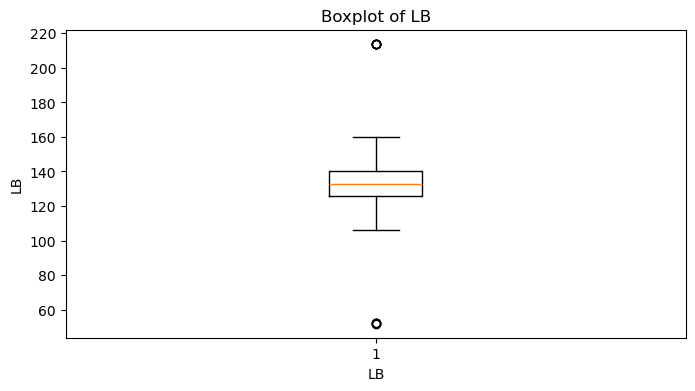

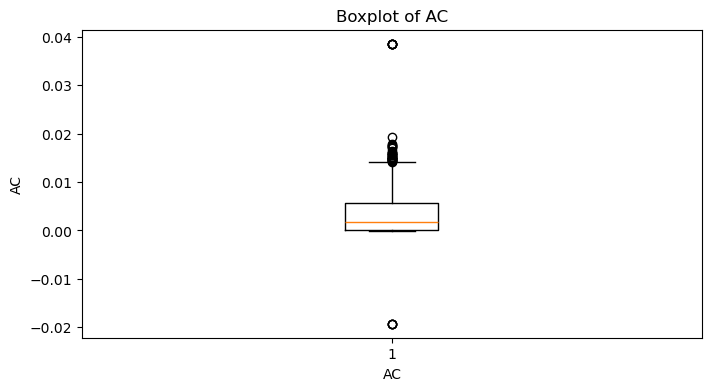

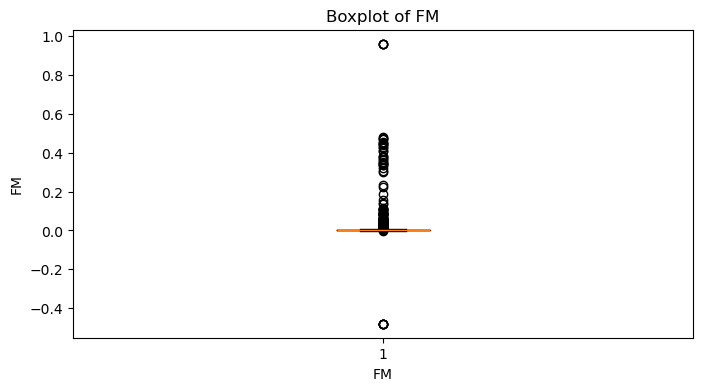

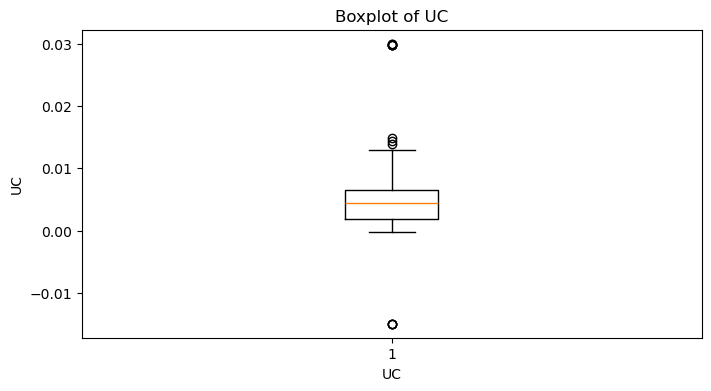

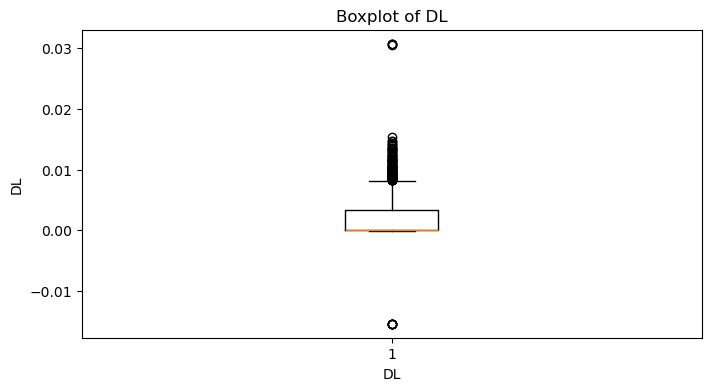

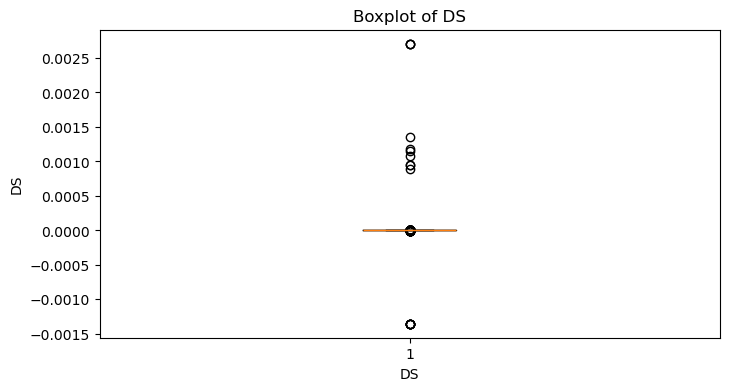

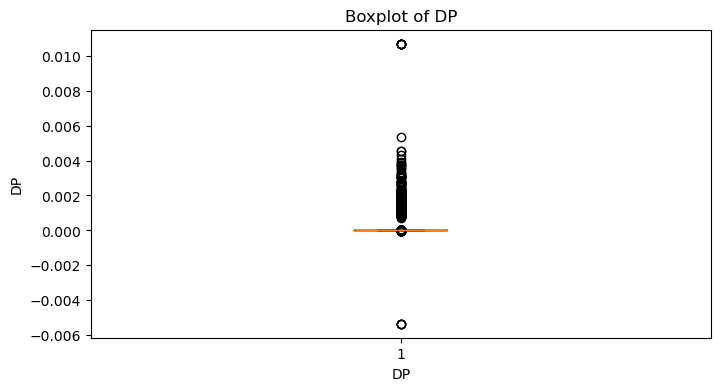

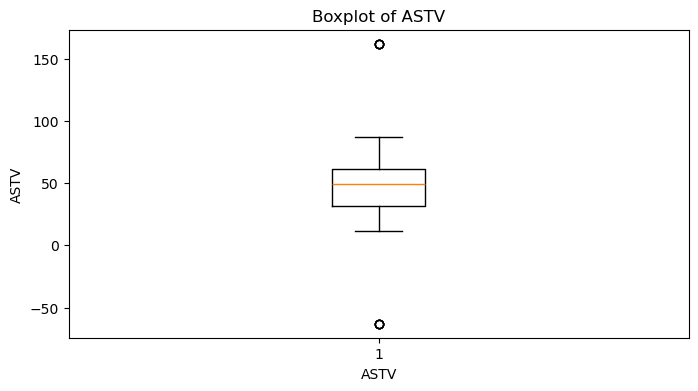

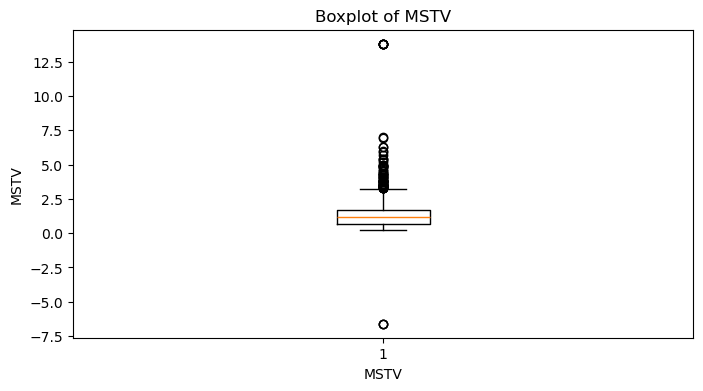

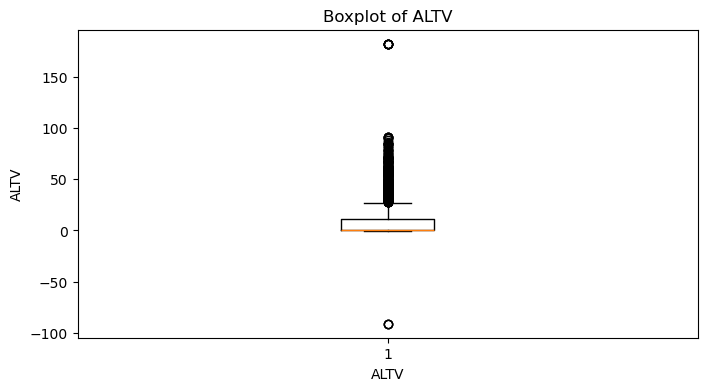

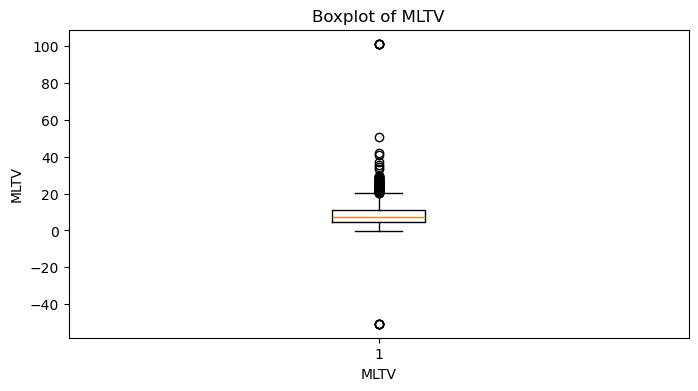

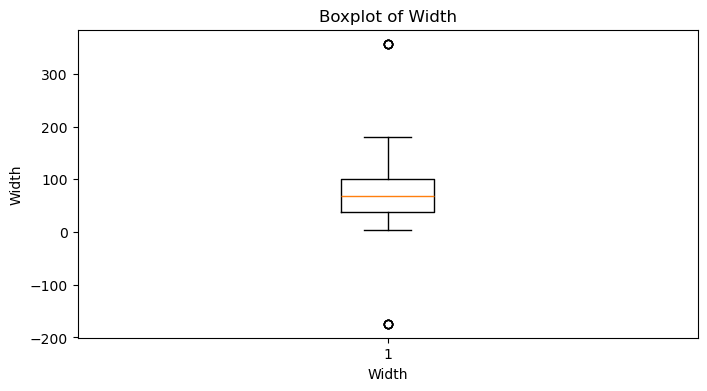

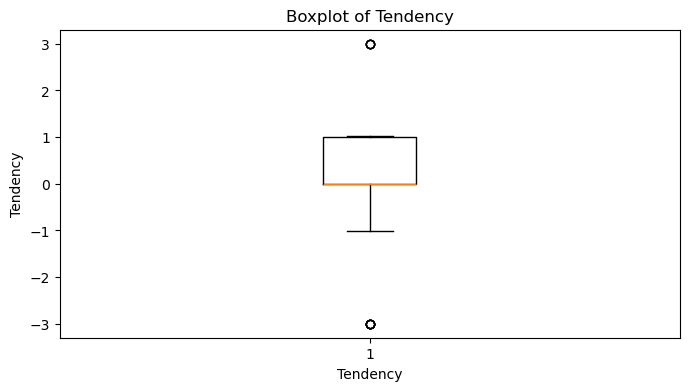

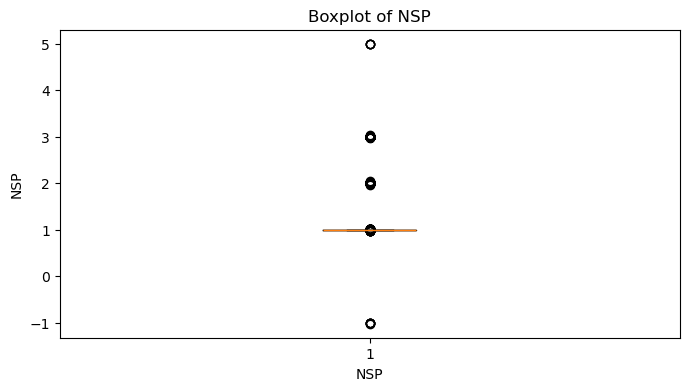

In [18]:
#checking outliers using boxplot
for col in df:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xlabel(col)
    plt.show()

In [19]:
# using INTER QUANTILE METHODS
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
low_ext=q1-1.5*IQR
upp_ext=q3+1.5*IQR
print('lower_extreme:',low_ext)
print('upper_extreme:',upp_ext)

lower_extreme: LB          105.000000
AC           -0.008508
FM           -0.003853
UC           -0.005158
DL           -0.004938
DS            0.000000
DP            0.000000
ASTV        -11.500000
MSTV         -0.800000
ALTV        -16.500000
MLTV         -4.850000
Width       -57.875000
Tendency     -1.500000
NSP           1.000000
dtype: float64
upper_extreme: LB          161.000000
AC            0.014180
FM            0.006421
UC            0.013552
DL            0.008230
DS            0.000000
DP            0.000000
ASTV        104.500000
MSTV          3.200000
ALTV         27.500000
MLTV         20.350000
Width       195.125000
Tendency      2.500000
NSP           1.000000
dtype: float64


In [20]:
#removing outliers
df1=df[(df >= low_ext) & (df <=upp_ext)]
print('Before removing outliers:',len(df))
print('After removing outliers:',len(df1))
print('Outliers:',len(df)-len(df1))

Before removing outliers: 2124
After removing outliers: 2124
Outliers: 0


In [21]:
#capping - change the outliers values to upper or lower values
df1=df.copy()

# Apply capping
df_capped = df1.clip(lower=low_ext, upper=upp_ext, axis=1)
df2=df_capped

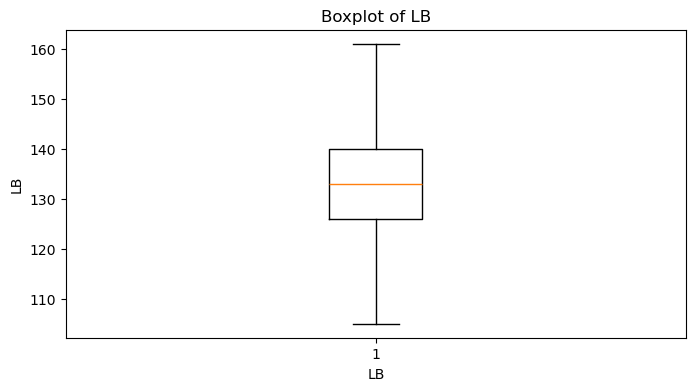

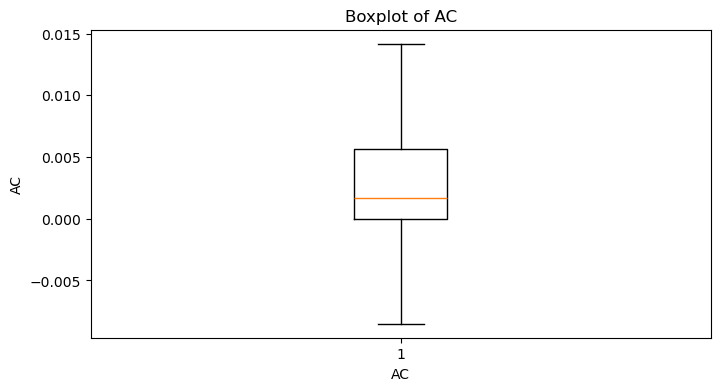

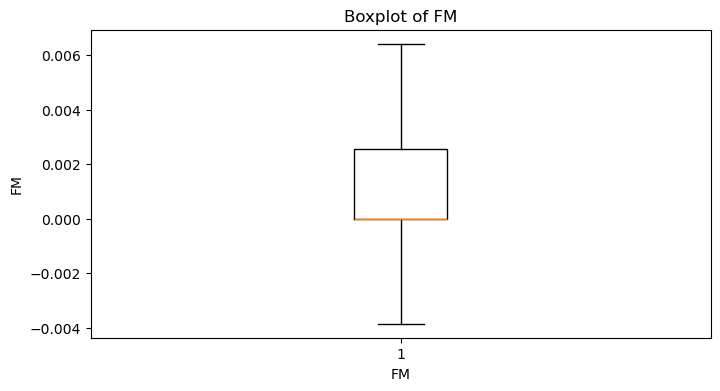

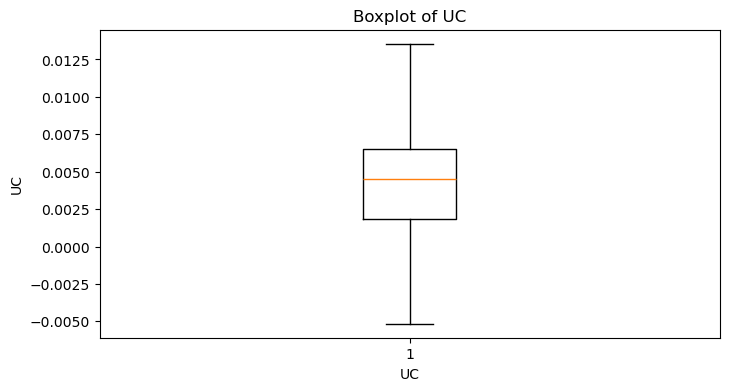

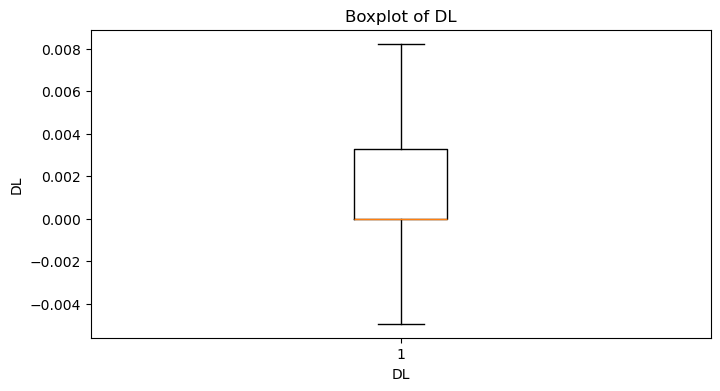

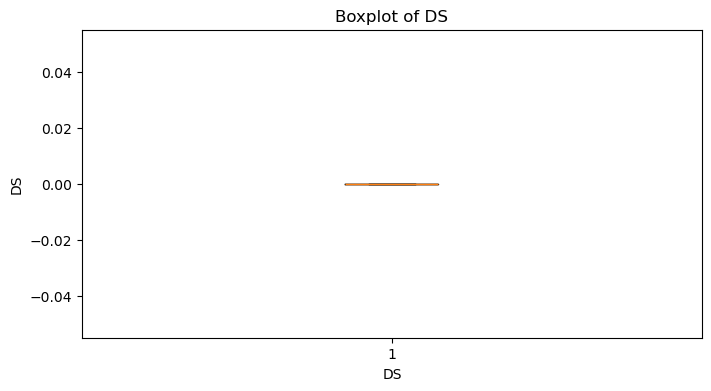

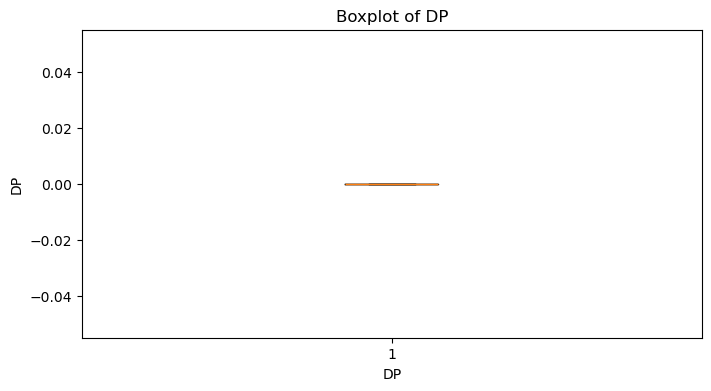

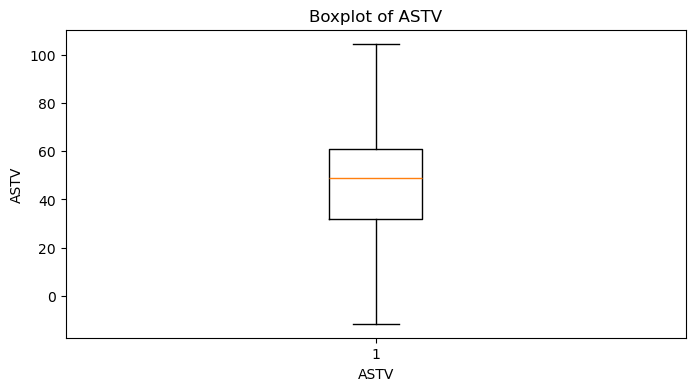

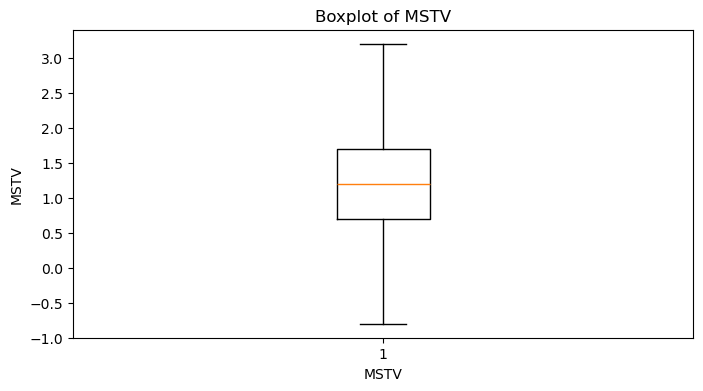

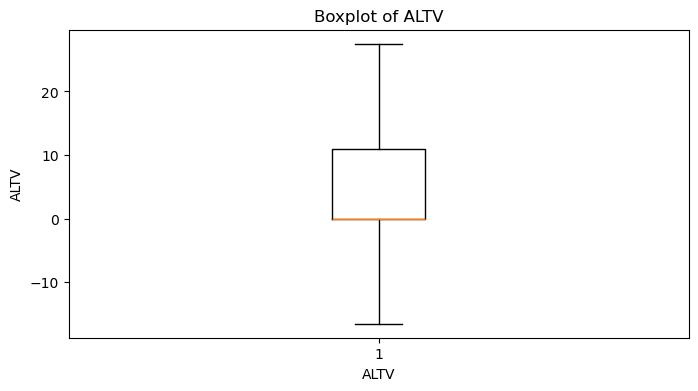

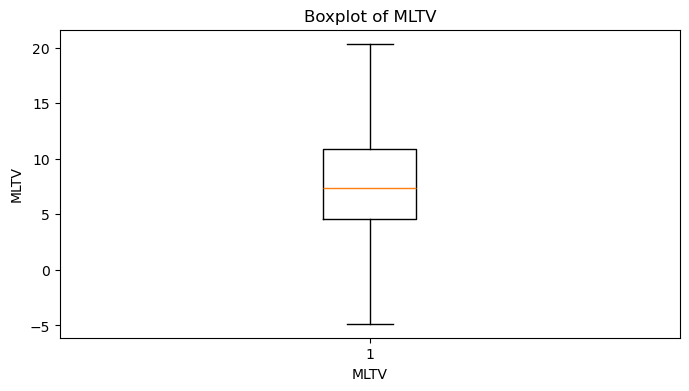

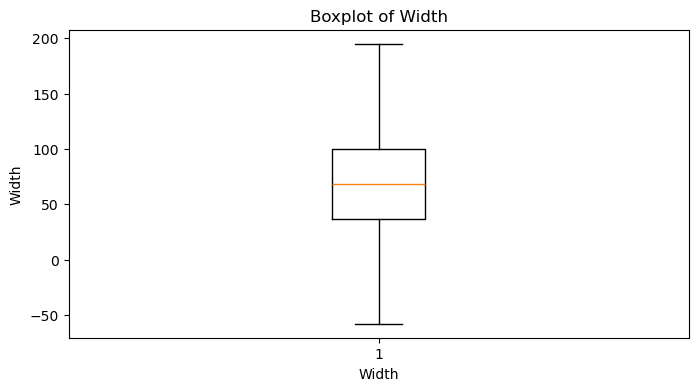

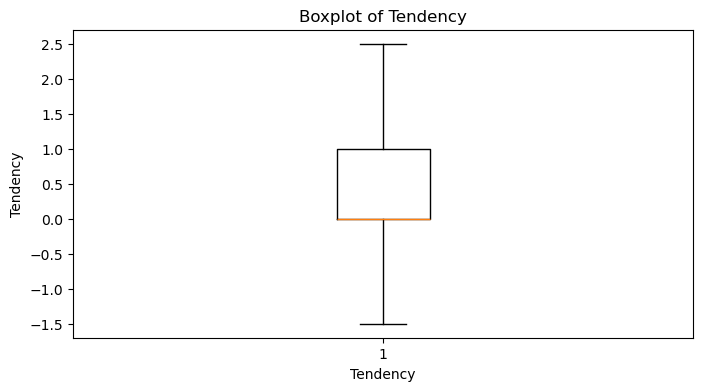

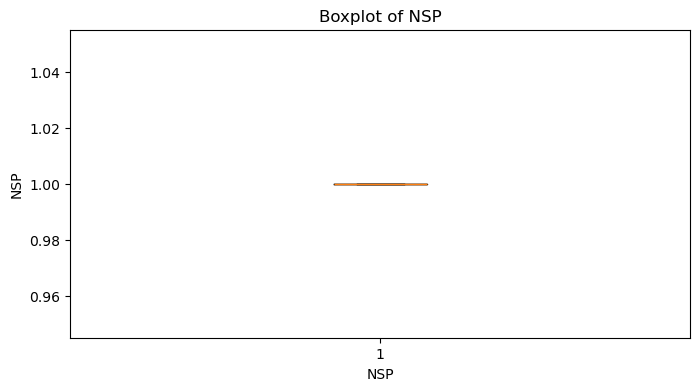

In [22]:
#for checking outliers after removing the outliers using boxplot
for col in df2:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df2[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xlabel(col)
    plt.show()

In [23]:
corr=df2.corr()
corr

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.079710,-0.009861,-0.160194,-0.159732,NaN,NaN,0.285993,-0.298372,0.323142,-0.041603,-0.140462,0.281455,NaN
AC,-0.079710,1.000000,0.074078,0.091526,-0.102425,NaN,NaN,-0.272150,0.217273,-0.410003,-0.152859,0.286283,0.027453,NaN
FM,-0.009861,0.074078,1.000000,-0.318156,-0.018024,NaN,NaN,0.155798,0.070412,-0.013820,-0.039745,0.165196,0.002376,NaN
UC,-0.160194,0.091526,-0.318156,1.000000,0.268151,NaN,NaN,-0.217484,0.298462,-0.294226,-0.073143,0.130354,-0.071912,NaN
DL,-0.159732,-0.102425,-0.018024,0.268151,1.000000,NaN,NaN,-0.112289,0.566625,-0.296383,-0.241884,0.515238,0.011041,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.285993,-0.272150,0.155798,-0.217484,-0.112289,NaN,NaN,1.000000,-0.433731,0.438800,-0.324559,-0.244357,-0.008659,NaN
MSTV,-0.298372,0.217273,0.070412,0.298462,0.566625,NaN,NaN,-0.433731,1.000000,-0.541296,0.010524,0.650005,-0.066157,NaN
ALTV,0.323142,-0.410003,-0.013820,-0.294226,-0.296383,NaN,NaN,0.438800,-0.541296,1.000000,-0.130831,-0.441734,0.051353,NaN


In [24]:
# here droped the this two (NaN values) but drop in the original dataset
df3=df2.drop(columns=['DS','DP','NSP'])
corr1=df3.corr()

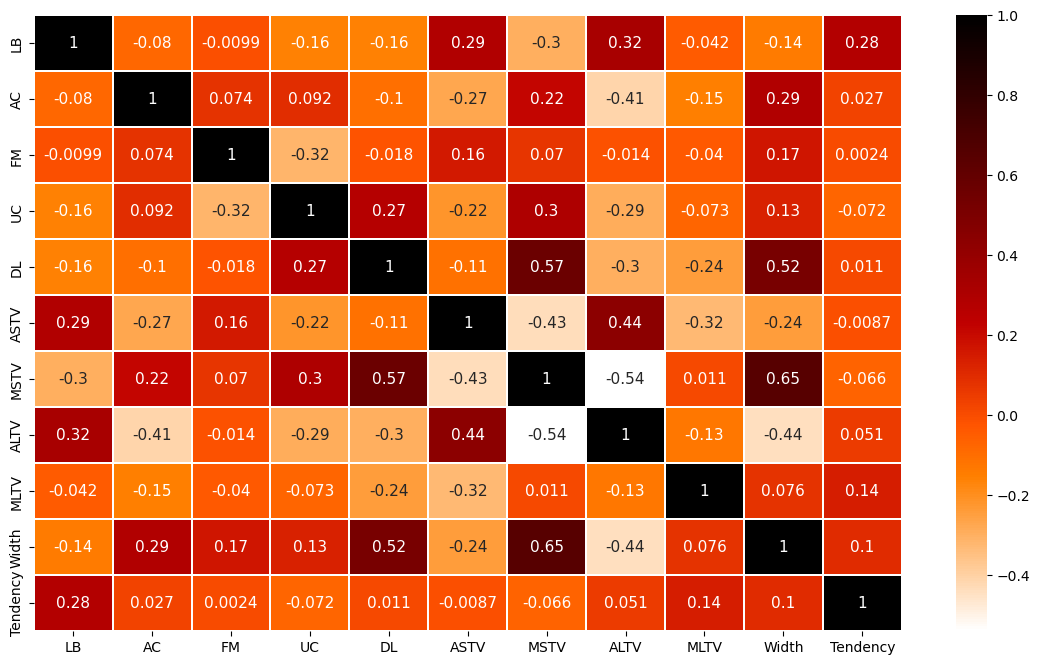

In [25]:
# patters
plt.figure(figsize=(14,8))
sns.heatmap(corr1,annot=True,cmap=plt.cm.gist_heat_r,annot_kws={'size':11},linewidth=0.05)
plt.show()

In [26]:
numcol=[i for i in df3.columns if df3[i].dtype!='O']
numcol

['LB',
 'AC',
 'FM',
 'UC',
 'DL',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'Width',
 'Tendency']

# 2. Statistical Summary

In [28]:
#summary the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LB,2124.0,133.356183,11.260563,51.842487,126.000000,133.000000,140.000000,214.000000
AC,2124.0,0.003235,0.004397,-0.019284,0.000000,0.001658,0.005672,0.038567
FM,2124.0,0.009904,0.067571,-0.480634,0.000000,0.000000,0.002568,0.961268
UC,2124.0,0.004394,0.003340,-0.014925,0.001858,0.004486,0.006536,0.030002
DL,2124.0,0.001897,0.003344,-0.015393,0.000000,0.000000,0.003292,0.030769
DS,2124.0,0.000003,0.000142,-0.001353,0.000000,0.000000,0.000000,0.002706
DP,2124.0,0.000182,0.000871,-0.005348,0.000000,0.000000,0.000000,0.010695
ASTV,2124.0,47.012459,18.812403,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,2124.0,1.364345,1.174084,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,2124.0,10.295650,21.212676,-91.000000,0.000000,0.000000,11.000000,182.000000


In [29]:
#summary the data
df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LB,2124.0,133.306263,9.981193,105.000000,126.000000,133.000000,140.000000,161.000000
AC,2124.0,0.003164,0.003862,-0.008508,0.000000,0.001658,0.005672,0.014180
FM,2124.0,0.001570,0.002487,-0.003853,0.000000,0.000000,0.002568,0.006421
UC,2124.0,0.004365,0.003001,-0.005158,0.001858,0.004486,0.006536,0.013552
DL,2124.0,0.001772,0.002670,-0.004938,0.000000,0.000000,0.003292,0.008230
ASTV,2124.0,46.998334,17.609911,-11.500000,32.000000,49.000000,61.000000,104.500000
MSTV,2124.0,1.304554,0.781303,-0.800000,0.700000,1.200000,1.700000,3.200000
ALTV,2124.0,6.697979,10.381254,-16.500000,0.000000,0.000000,11.000000,27.500000
MLTV,2124.0,8.016930,5.101434,-4.850000,4.600000,7.400000,10.900000,20.350000
Width,2124.0,70.590572,39.801176,-57.875000,37.000000,68.000000,100.250000,195.125000


# Data Visualization

#here df is original dataset  and  df3 is cleaned dataset

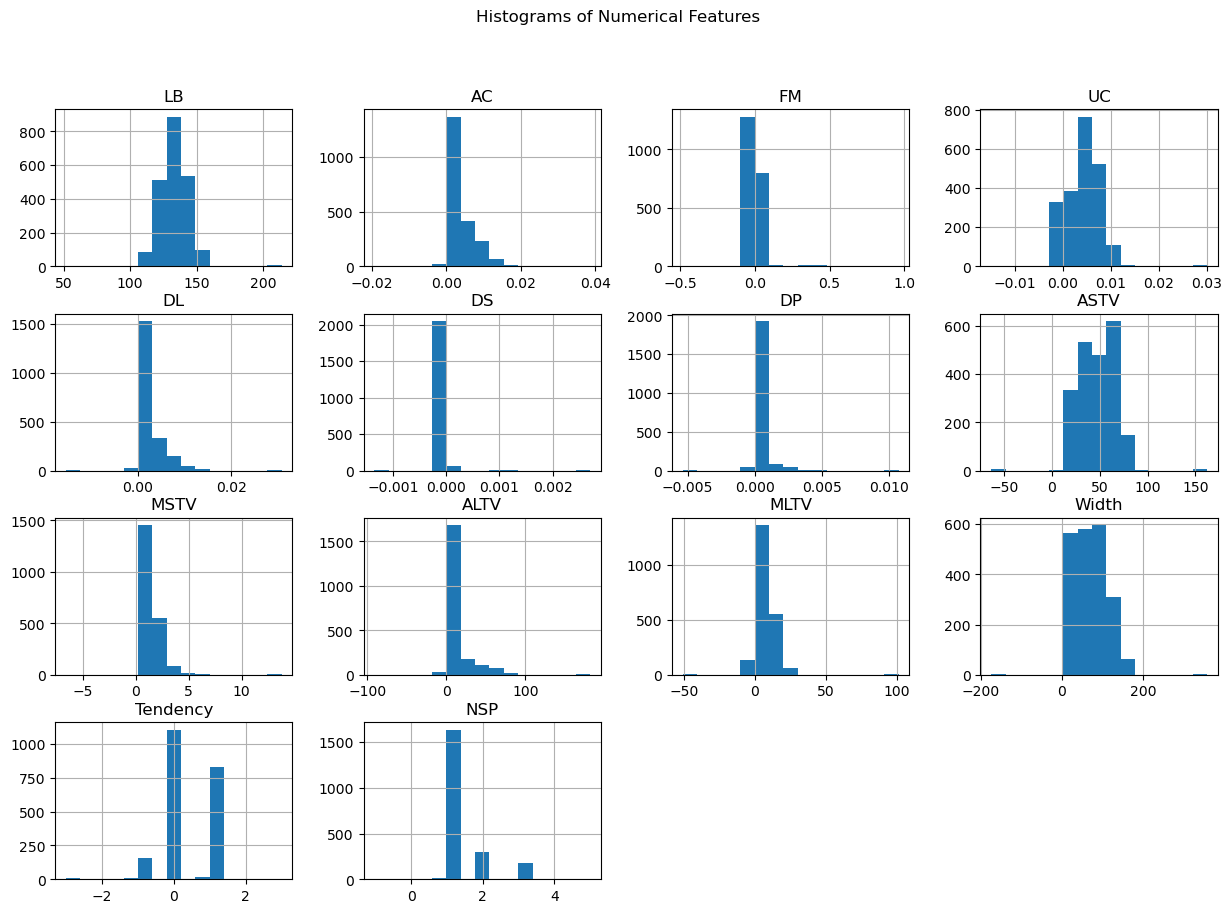

In [31]:
# Histograms for each numerical column
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Histograms of Numerical Features")
plt.show()

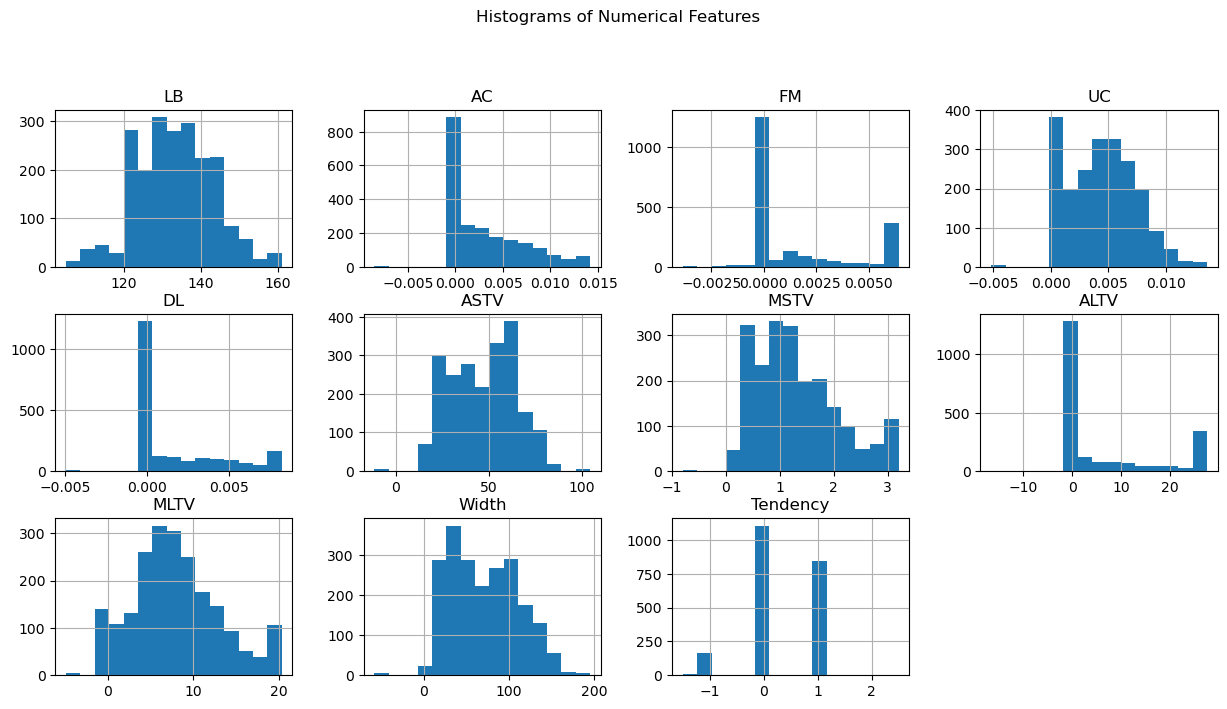

In [32]:
# Histograms for each numerical column
df3.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Histograms of Numerical Features")
plt.show()

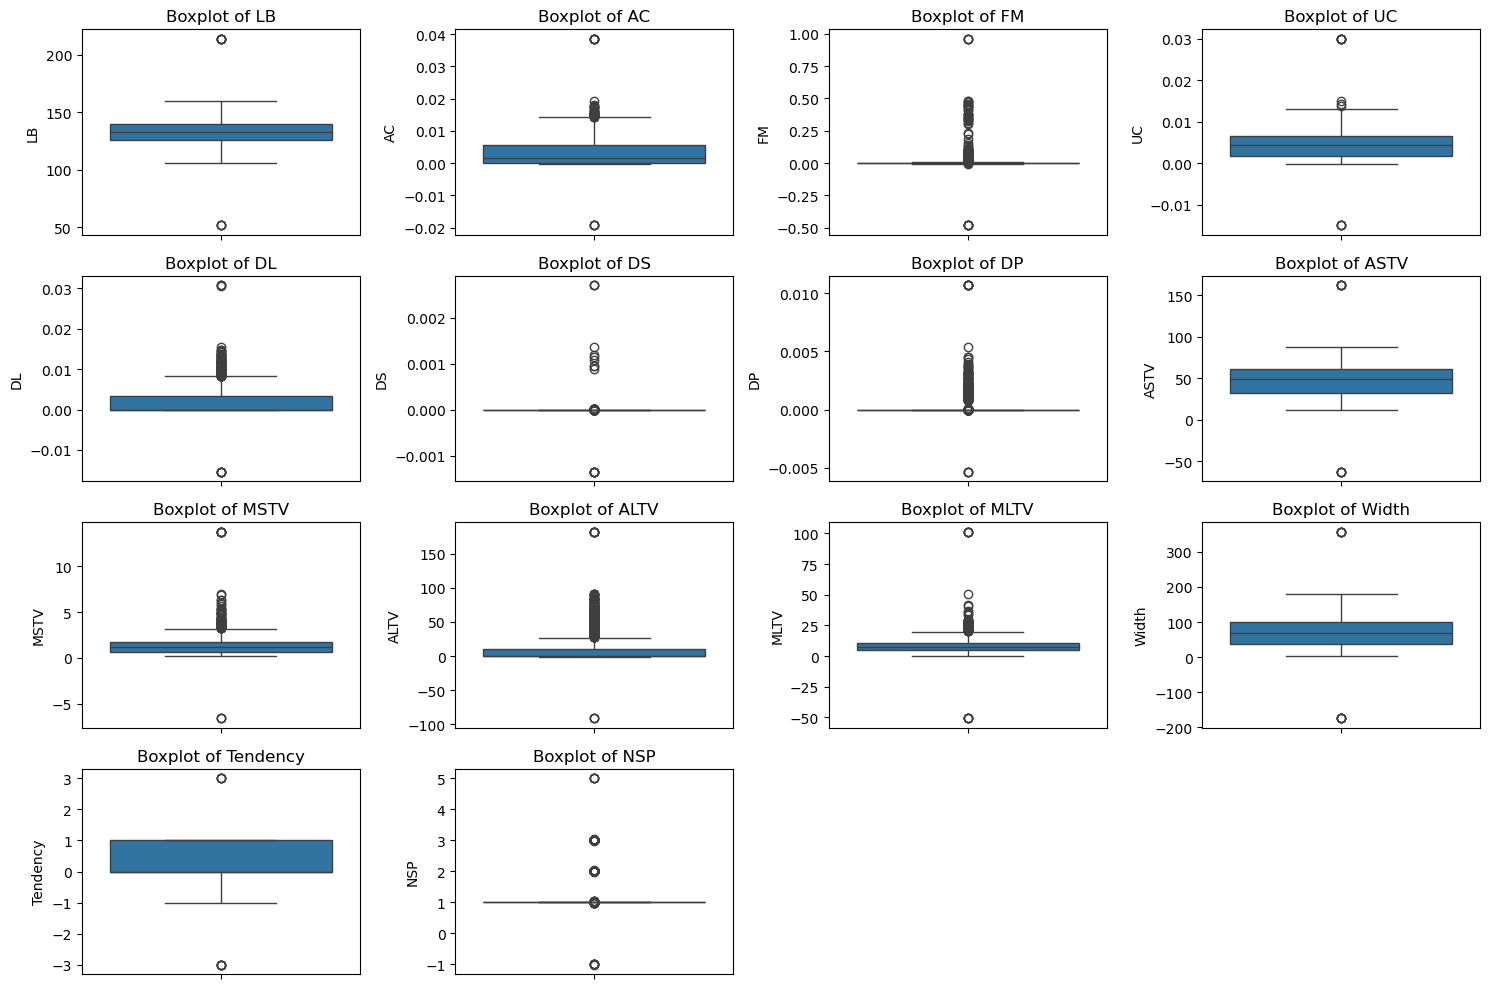

In [33]:
# Boxplots for each numerical column to see the distributions and outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


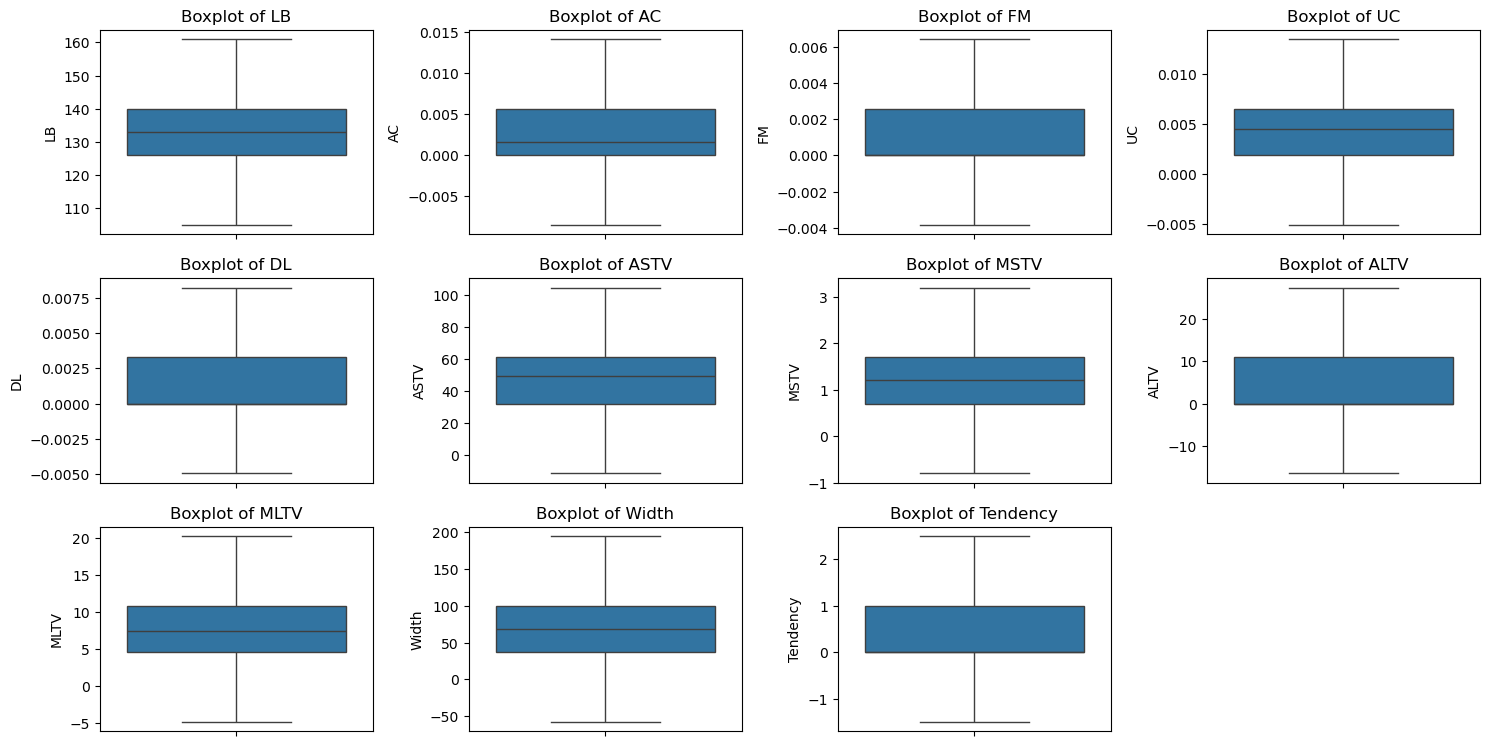

In [34]:
# Boxplots for each numerical column to see the distributions and after removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df3.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df3[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


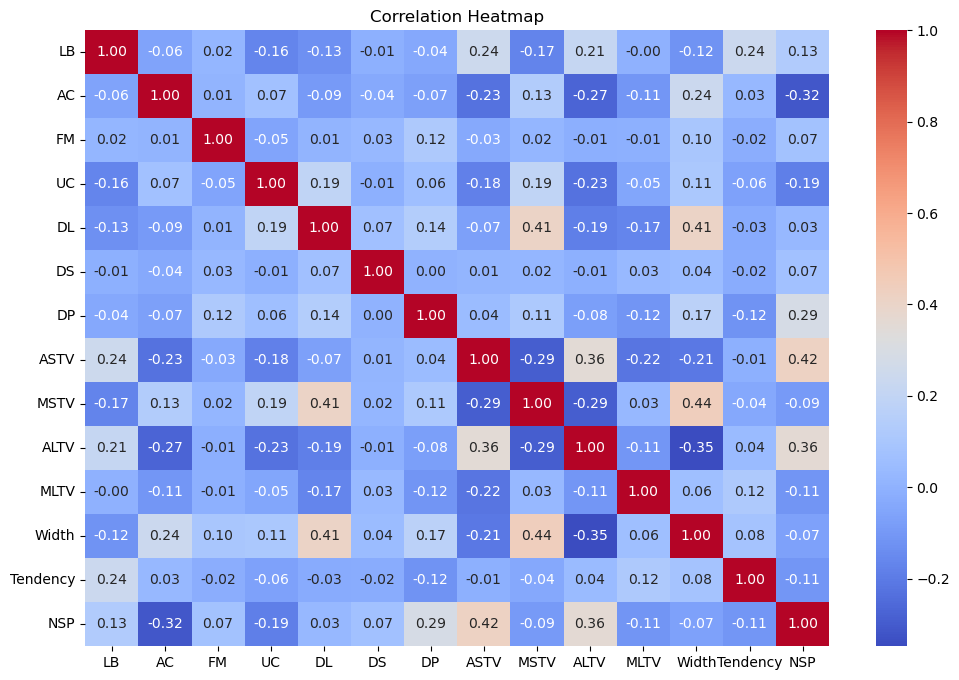

In [35]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


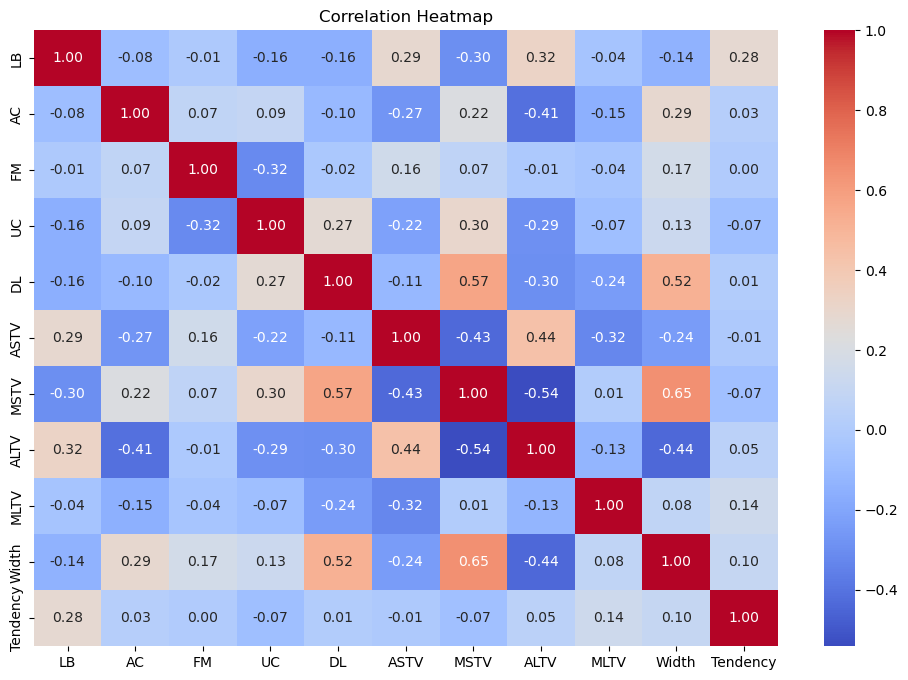

In [36]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


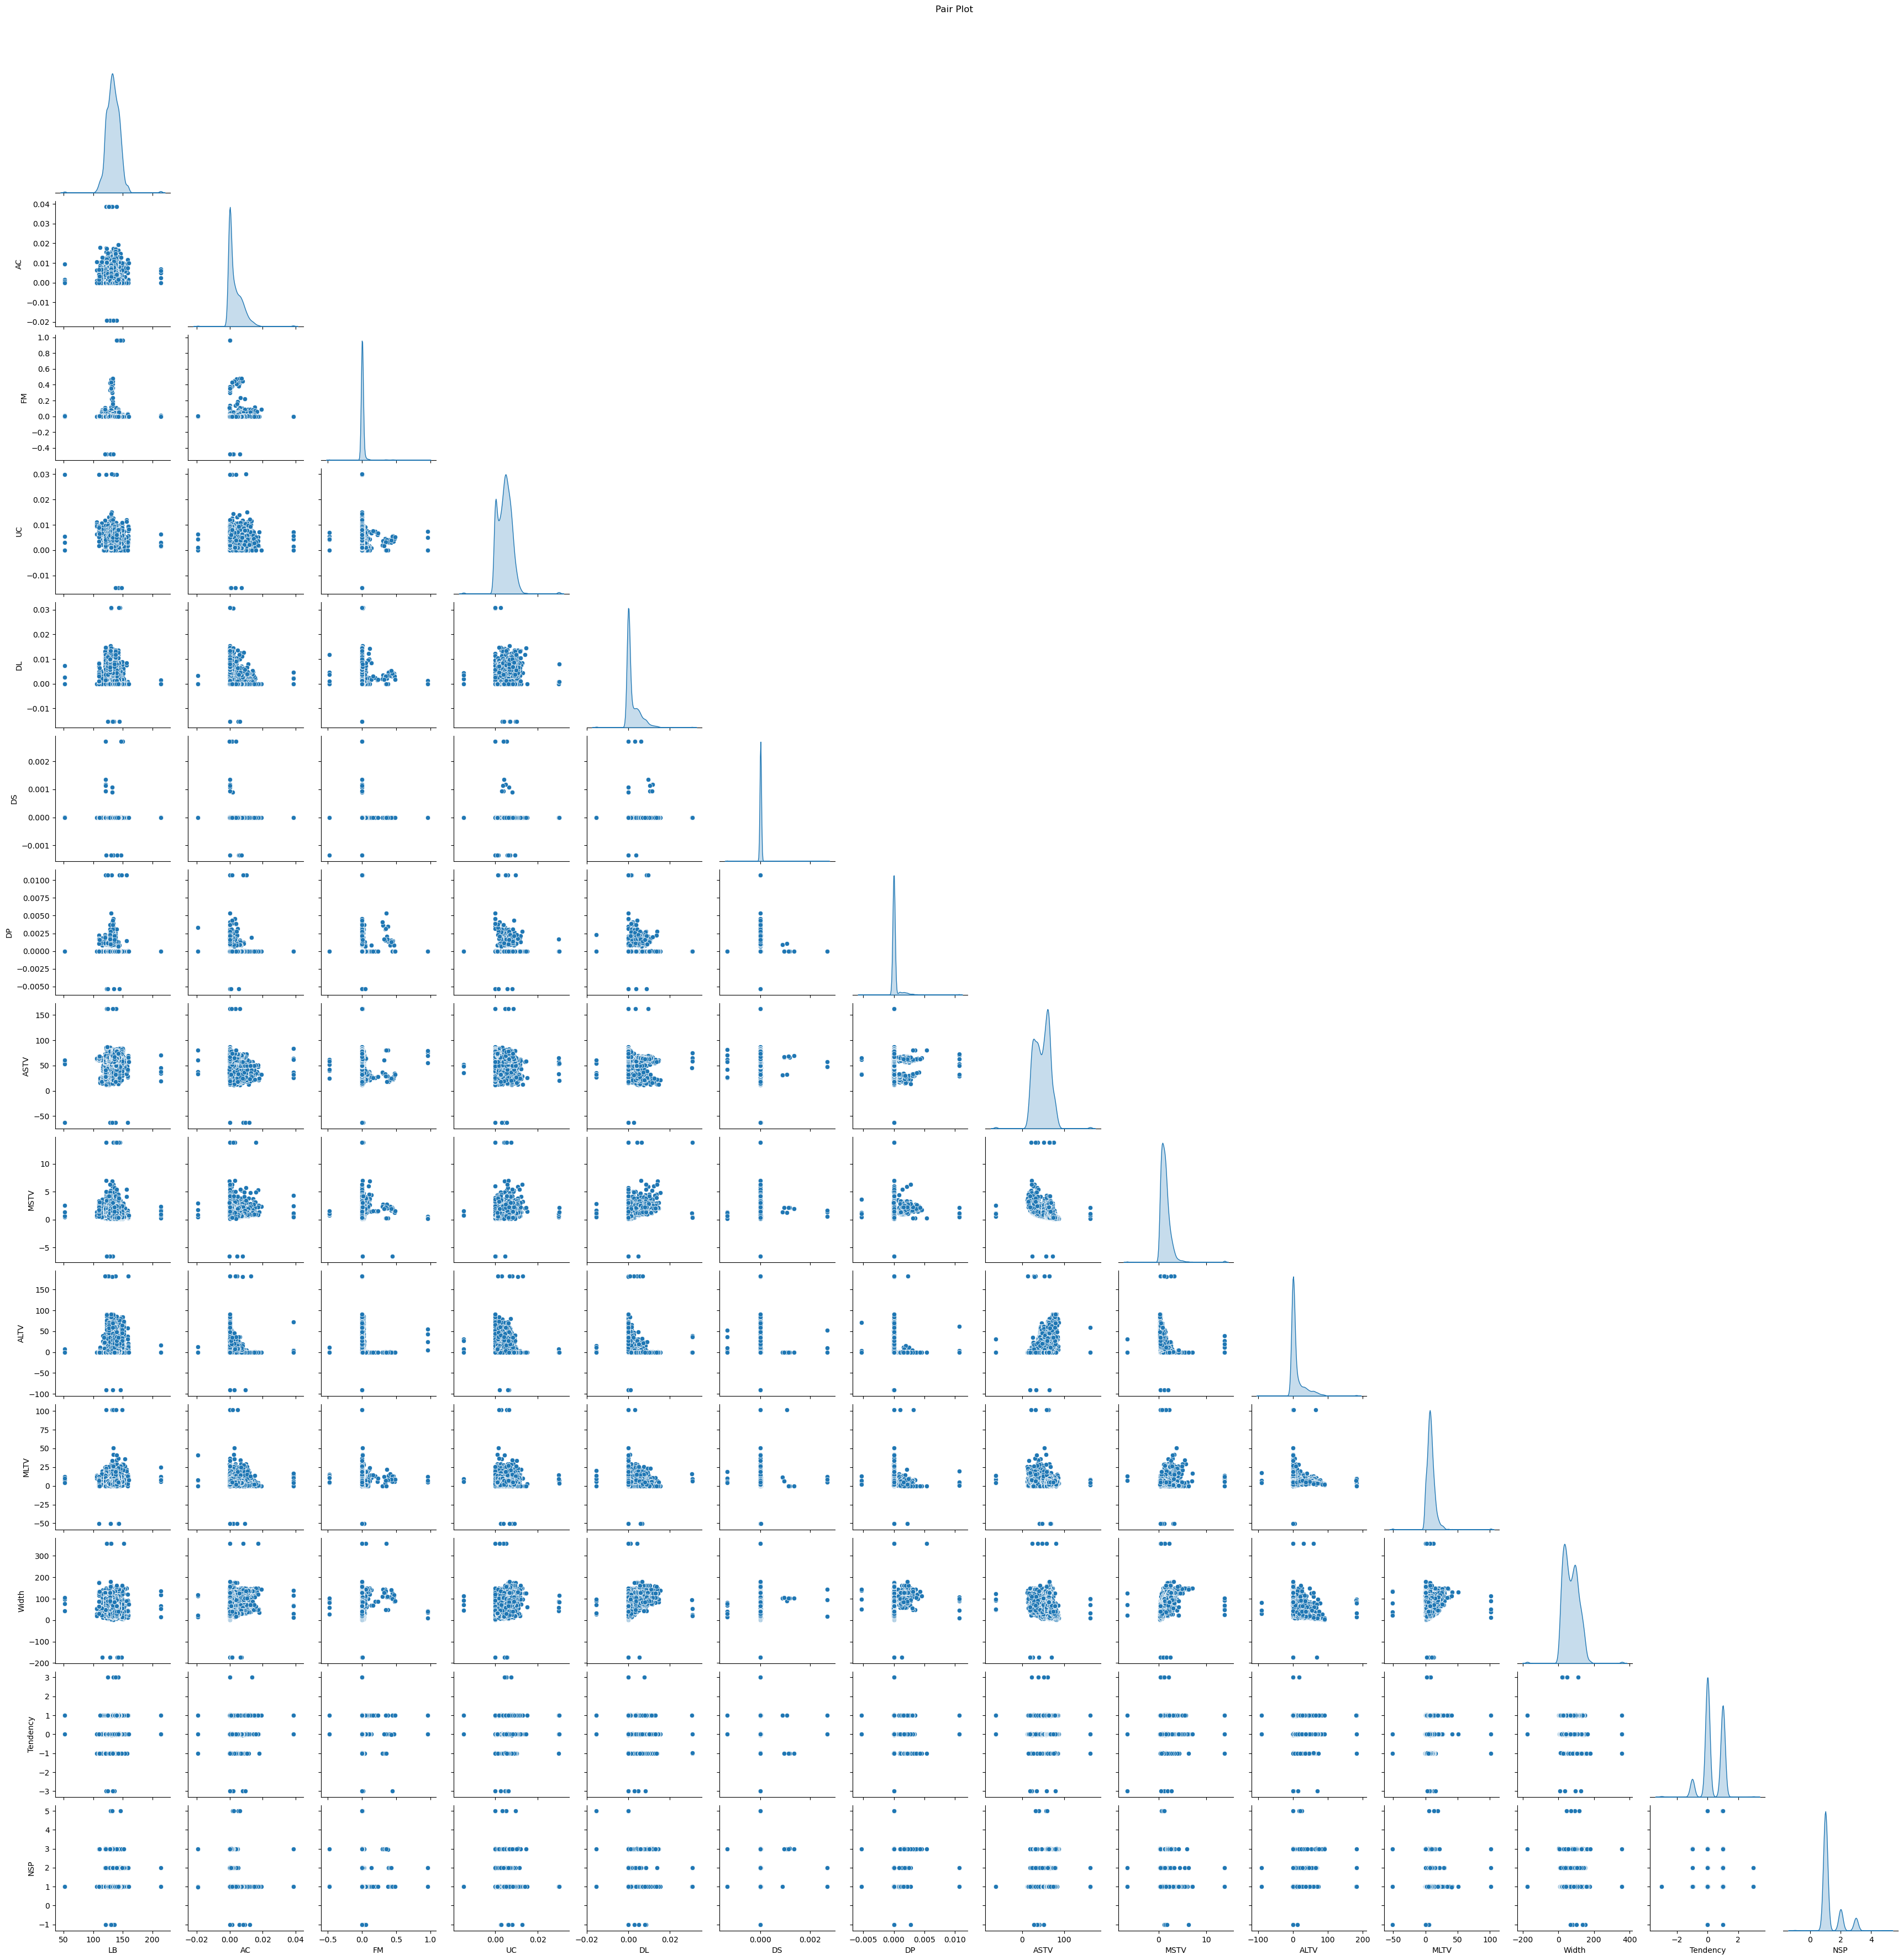

In [37]:
# Pair Plot for selected columns (if dataset size is manageable)
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle("Pair Plot", y=1.02)
plt.show()


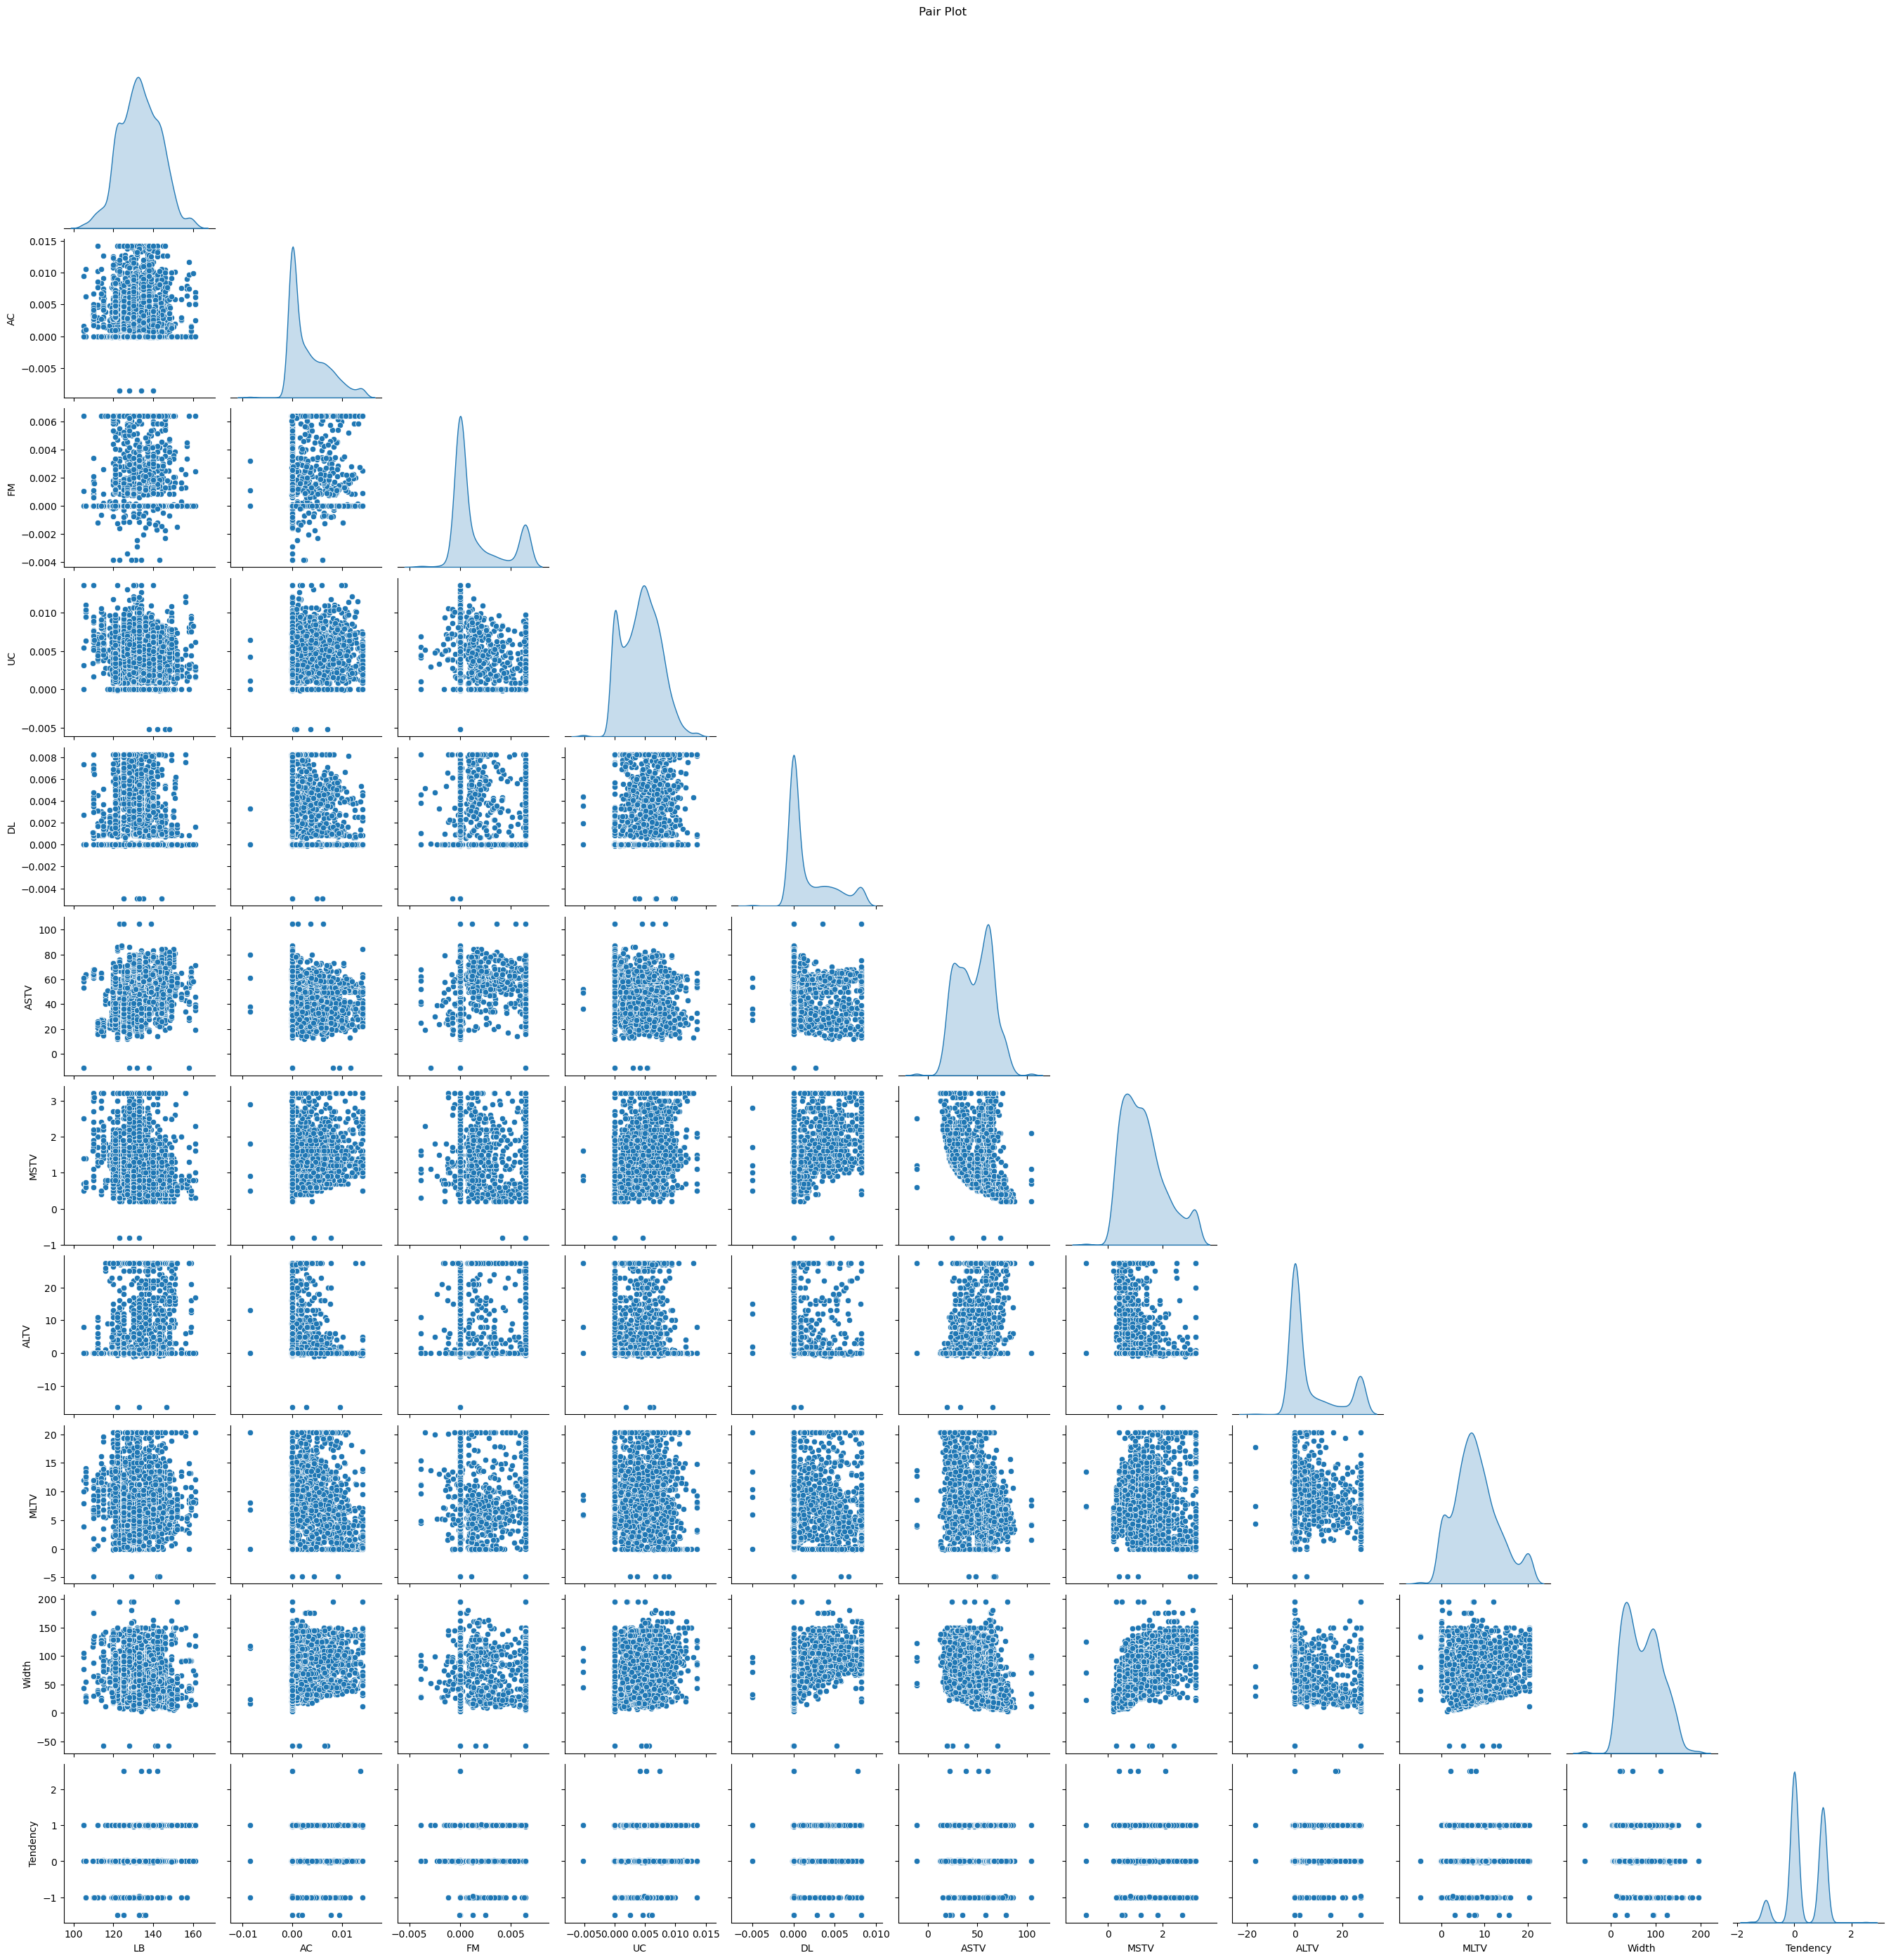

In [38]:
# Pair Plot for selected columns (if dataset size is manageable)
sns.pairplot(df3, diag_kind='kde', corner=True)
plt.suptitle("Pair Plot", y=1.02)
plt.show()


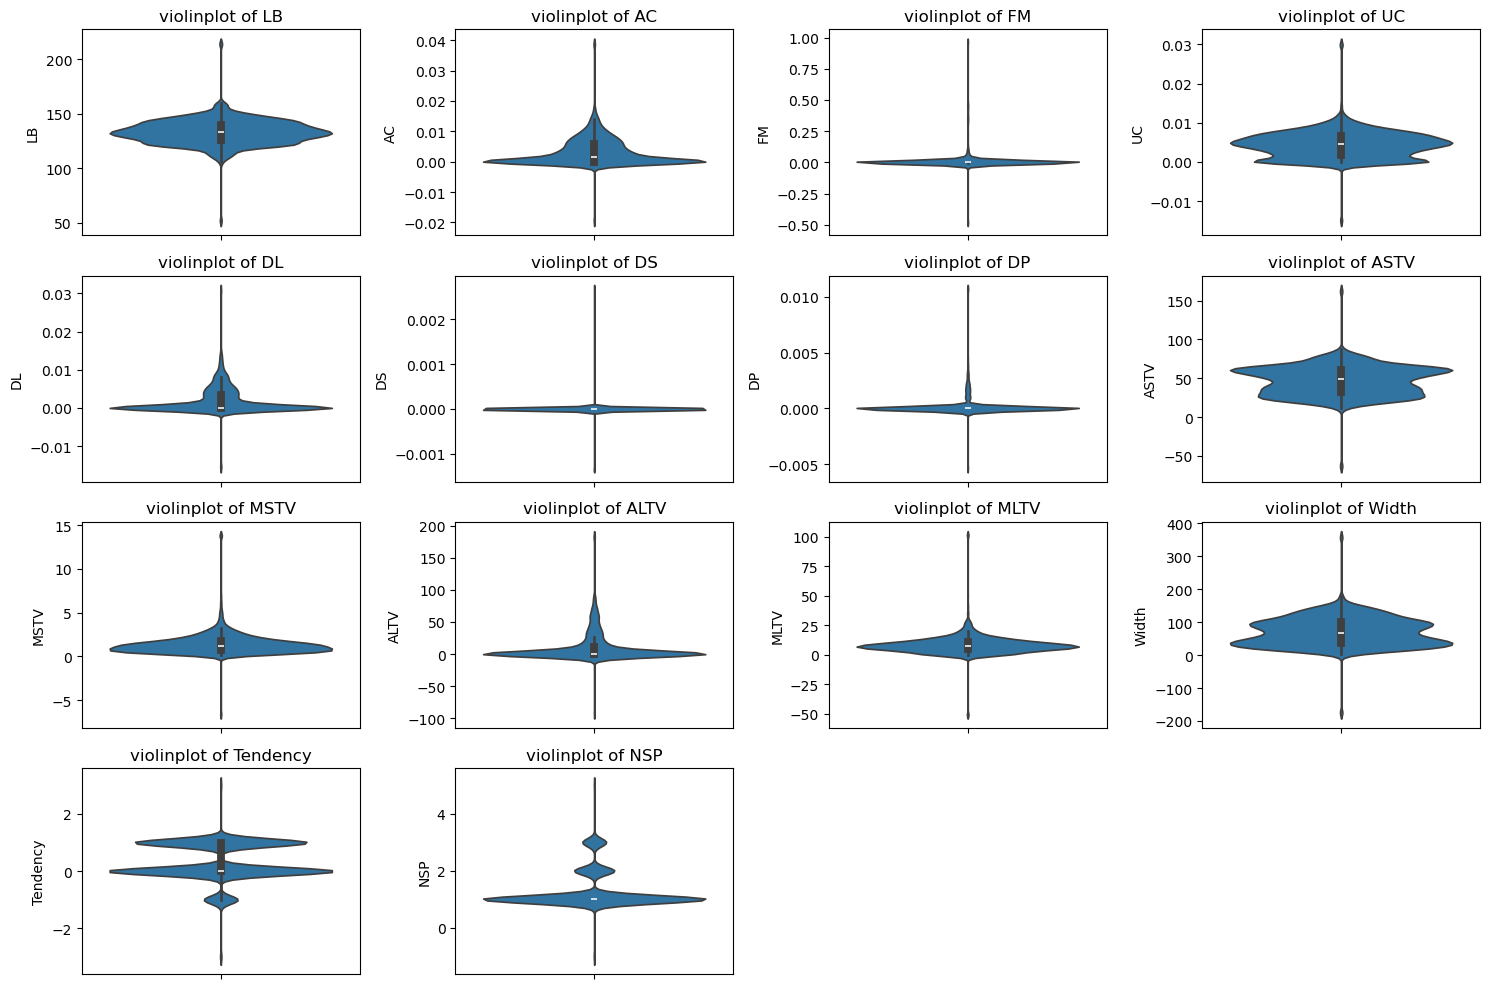

In [39]:
# Violinplots for each numerical column to see the distributions and outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(4, 4, i)
    sns.violinplot(y=df[col])
    plt.title(f'violinplot of {col}')
plt.tight_layout()
plt.show()


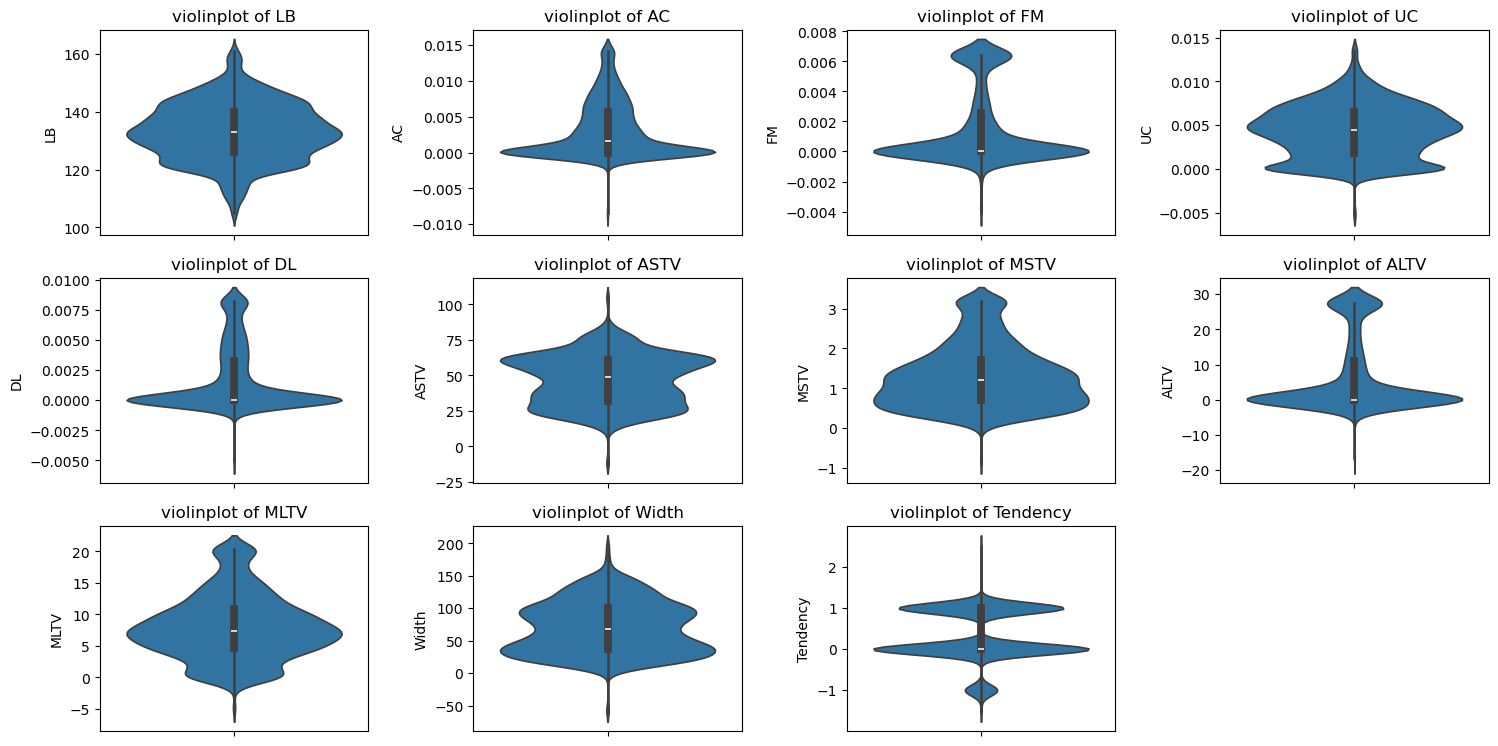

In [40]:
# violinplots for each numerical column to see the distributions and outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df3.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(4, 4, i)
    sns.violinplot(y=df3[col])
    plt.title(f'violinplot of {col}')
plt.tight_layout()
plt.show()


# 4. Pattern Recognition and Insights

In [42]:
# Finding correlations between specific features
print("\nHighly correlated features:")
correlated_features = correlation_matrix[(correlation_matrix > 0.2) & (correlation_matrix <0.2)]
print(correlated_features)


Highly correlated features:
          LB  AC  FM  UC  DL  ASTV  MSTV  ALTV  MLTV  Width  Tendency
LB       NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN
AC       NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN
FM       NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN
UC       NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN
DL       NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN
ASTV     NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN
MSTV     NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN
ALTV     NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN
MLTV     NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN
Width    NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN
Tendency NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN
